In [1]:
# ==========================================================
# BLOCCO 1 (Imbalanced): Lettura dataset salvati
# ==========================================================
import pandas as pd
import joblib
import os

# Cartella dei dati salvati
data_folder_imb = "model_data_imbalanced"
data_folder = "model_data"
class_weights_dict = joblib.load(os.path.join(data_folder, "class_weights_dict.pkl"))

print("📦 Dataset e class weights caricati correttamente.")
print(f"⚖️ Class Weights: {class_weights_dict}")

# 1️⃣ Lettura train/test set
X_train_imb_scaled = pd.read_csv(os.path.join(data_folder_imb, "X_train_imb.csv"))
X_test_imb_scaled  = pd.read_csv(os.path.join(data_folder_imb, "X_test_imb.csv"))
y_train_imb = pd.read_csv(os.path.join(data_folder_imb, "y_train_imb.csv")).squeeze()
y_test_imb  = pd.read_csv(os.path.join(data_folder_imb, "y_test_imb.csv")).squeeze()

# 2️⃣ Lettura scaler (utile per nuovi dati o inferenza)
scaler_latent_imb = joblib.load(os.path.join(data_folder_imb, "scaler_latent_imb.pkl"))

# 3️⃣ Controllo dimensioni e classi
print(f"X_train_imb_scaled: {X_train_imb_scaled.shape}, X_test_imb_scaled: {X_test_imb_scaled.shape}")
print(f"y_train_imb distribution:\n{y_train_imb.value_counts()}")
print(f"y_test_imb distribution:\n{y_test_imb.value_counts()}")

# ✅ Ora X_train_imb_scaled, X_test_imb_scaled, y_train_imb, y_test_imb e scaler_latent_imb
# sono pronti per il training del Random Forest sul dataset non bilanciato


📦 Dataset e class weights caricati correttamente.
⚖️ Class Weights: {'Other': 26.327615489130434, 'Reconnaissance': 2.70431945849761, 'Resource Development': 0.2953728721194776, 'Discovery': 4.838233458177278}
X_train_imb_scaled: (248027, 16), X_test_imb_scaled: (62007, 16)
y_train_imb distribution:
label_tactic_reduced
Resource Development    209927
Reconnaissance           22929
Discovery                12816
Other                     2355
Name: count, dtype: int64
y_test_imb distribution:
label_tactic_reduced
Resource Development    52482
Reconnaissance           5732
Discovery                3204
Other                     589
Name: count, dtype: int64


🏗️ Addestramento Random Forest (IMBALANCED) con class weights e monitoraggio dettagliato...

🔍 Inizio GridSearch manuale su 2 combinazioni...

⚙️ Combinazione 1/2 → {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}
   📈 Fold 1/5 → F1 = 0.8878
   📈 Fold 2/5 → F1 = 0.8851
   📈 Fold 3/5 → F1 = 0.8960
   📈 Fold 4/5 → F1 = 0.8846
   📈 Fold 5/5 → F1 = 0.8867
✅ Combinazione 1 completata in 227.05s | F1 medio = 0.8880

⚙️ Combinazione 2/2 → {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}
   📈 Fold 1/5 → F1 = 0.9747
   📈 Fold 2/5 → F1 = 0.9760
   📈 Fold 3/5 → F1 = 0.9739
   📈 Fold 4/5 → F1 = 0.9748
   📈 Fold 5/5 → F1 = 0.9667
✅ Combinazione 2 completata in 187.29s | F1 medio = 0.9732

🏁 GridSearch completata. Miglior F1 = 0.9732
🏆 Migliori iperparametri trovati: {'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'bootstrap': True}


📊 Metric

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


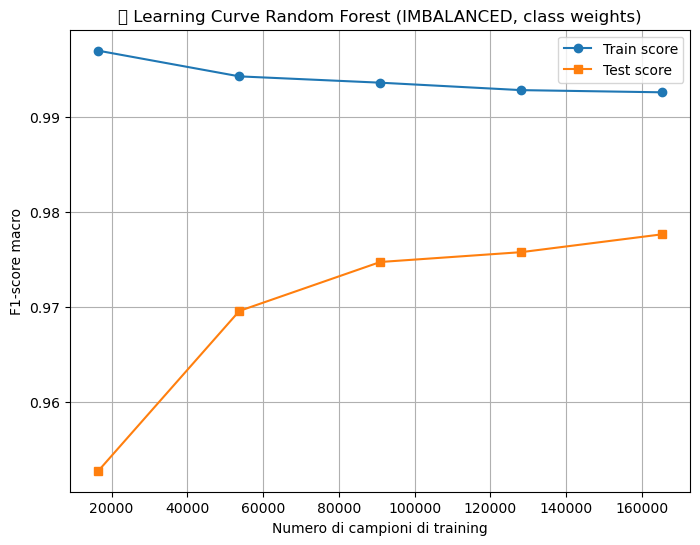


📊 Generazione grafici e visualizzazioni...


<Figure size 800x600 with 0 Axes>

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


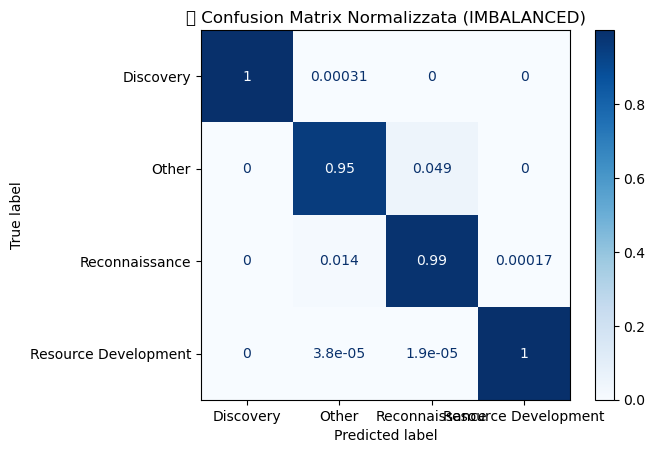

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


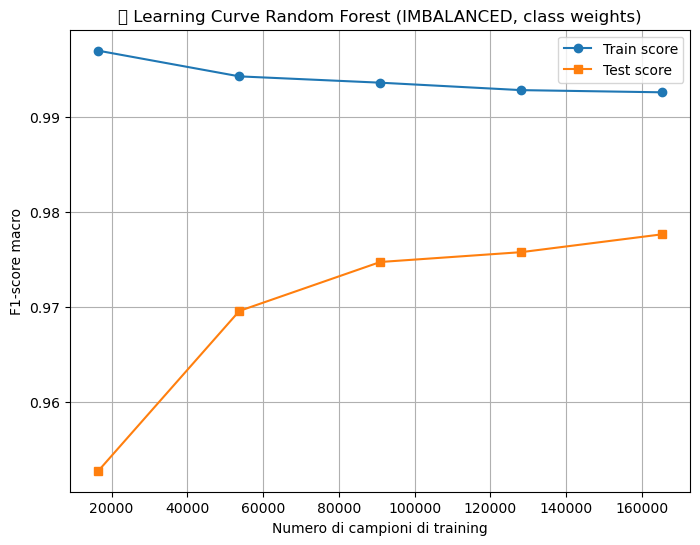

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


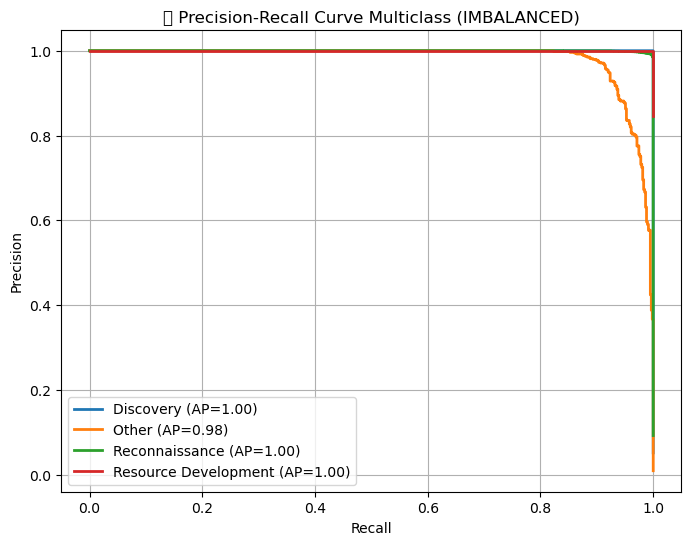

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


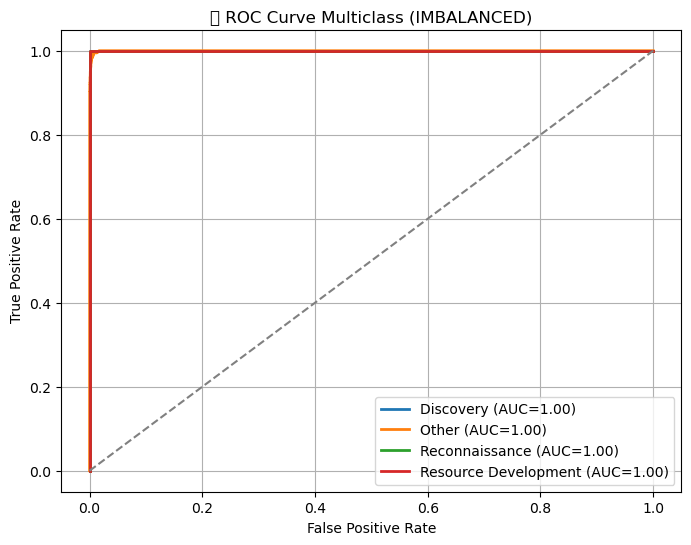

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


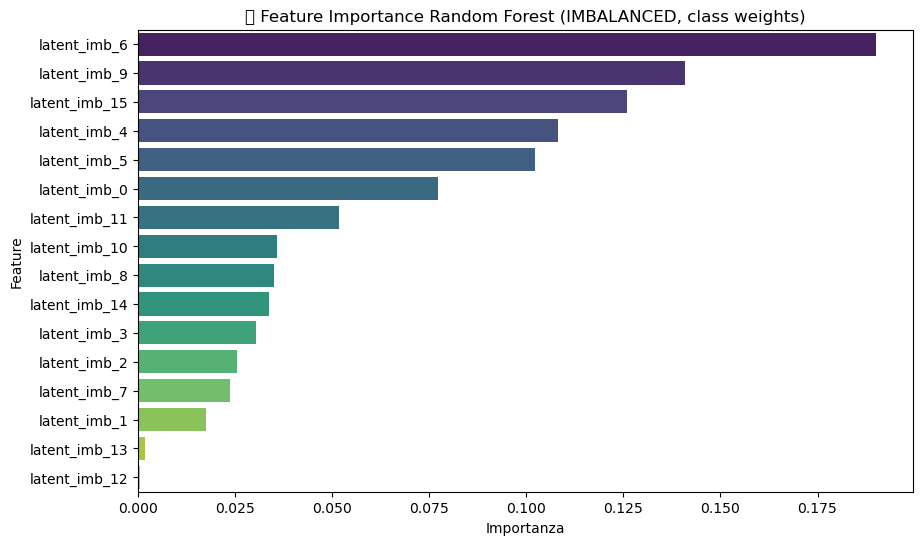

In [2]:
# ==========================================================
# BLOCCO 2 (Imbalanced): Random Forest con class weights + metriche complete e monitoraggio
# ==========================================================
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc, average_precision_score
)
from sklearn.preprocessing import label_binarize

print("🏗️ Addestramento Random Forest (IMBALANCED) con class weights e monitoraggio dettagliato...\n")

# ==========================================================
# 1️⃣ Impostazione base del modello e della griglia iperparametri
# ==========================================================
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights_dict
)

param_grid = {
    'max_depth': [10, 20],
    'min_samples_split': [5],
    'min_samples_leaf': [2],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}

param_combinations = list(product(
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf'],
    param_grid['max_features'],
    param_grid['bootstrap']
))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
results = []

print(f"🔍 Inizio GridSearch manuale su {len(param_combinations)} combinazioni...\n")

# ==========================================================
# 2️⃣ Ciclo combinazioni e monitoraggio training
# ==========================================================
for i, (max_depth, min_split, min_leaf, max_feat, boot) in enumerate(param_combinations, 1):
    params = {
        'max_depth': max_depth,
        'min_samples_split': min_split,
        'min_samples_leaf': min_leaf,
        'max_features': max_feat,
        'bootstrap': boot
    }
    print(f"⚙️ Combinazione {i}/{len(param_combinations)} → {params}")
    start = time.time()
    
    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_imb_scaled, y_train_imb), 1):
        X_tr, X_val = X_train_imb_scaled.iloc[train_idx], X_train_imb_scaled.iloc[val_idx]
        y_tr, y_val = y_train_imb.iloc[train_idx], y_train_imb.iloc[val_idx]

        model = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            class_weight=class_weights_dict,
            **params
        )
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred, average='macro')
        fold_scores.append(score)
        print(f"   📈 Fold {fold}/5 → F1 = {score:.4f}")

    mean_score = np.mean(fold_scores)
    elapsed = time.time() - start
    print(f"✅ Combinazione {i} completata in {elapsed:.2f}s | F1 medio = {mean_score:.4f}\n")

    results.append((params, mean_score))
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print(f"🏁 GridSearch completata. Miglior F1 = {best_score:.4f}")
print(f"🏆 Migliori iperparametri trovati: {best_params}\n")

# ==========================================================
# 3️⃣ Training finale con i migliori parametri
# ==========================================================
best_rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight=class_weights_dict,
    **best_params
)
best_rf.fit(X_train_imb_scaled, y_train_imb)

# ==========================================================
# 4️⃣ Metriche dettagliate
# ==========================================================
def print_metrics(y_true, y_pred, name, classes):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n📊 Metriche sul {name} set:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    # Specificità per classe
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    tn_fp = cm.sum(axis=1) + cm.sum(axis=0) - 2 * np.diag(cm)
    specificity = []
    for i, cls in enumerate(classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        specificity.append(spec)
        print(f"Specificità classe '{cls}': {spec:.4f}")
    return f1

y_train_pred = best_rf.predict(X_train_imb_scaled)
y_test_pred = best_rf.predict(X_test_imb_scaled)

train_f1 = print_metrics(y_train_imb, y_train_pred, "TRAIN", best_rf.classes_)
test_f1 = print_metrics(y_test_imb, y_test_pred, "TEST", best_rf.classes_)

# ==========================================================
# 5️⃣ Analisi over/underfitting
# ==========================================================
gap_f1 = train_f1 - test_f1
if gap_f1 > 0.05:
    print(f"\n⚠️ Possibile OVERFITTING: gap F1 train-test = {gap_f1:.4f}")
elif test_f1 < 0.7:
    print(f"\n⚠️ Possibile UNDERFITTING: F1 test = {test_f1:.4f}")
else:
    print("\n✅ Modello bilanciato, nessun evidente overfitting/underfitting")

# ==========================================================
# 6️⃣ Learning Curve
# ==========================================================
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_imb_scaled, y_train_imb, cv=3, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Train score", marker='o')
plt.plot(train_sizes, test_mean, label="Test score", marker='s')
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1-score macro")
plt.title("📈 Learning Curve Random Forest (IMBALANCED, class weights)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# 7️⃣ Visualizzazioni (Confusion Matrix, PR, ROC, Feature Importance)
# ==========================================================
print("\n📊 Generazione grafici e visualizzazioni...")

# Confusion Matrix
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(best_rf, X_test_imb_scaled, y_test_imb, cmap='Blues', normalize='true')
plt.title("📊 Confusion Matrix Normalizzata (IMBALANCED)")
plt.show()

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    best_rf, X_train_imb_scaled, y_train_imb, cv=3, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Train score", marker='o')
plt.plot(train_sizes, test_mean, label="Test score", marker='s')
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1-score macro")
plt.title("📈 Learning Curve Random Forest (IMBALANCED, class weights)")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
y_test_bin = label_binarize(y_test_imb, classes=best_rf.classes_)
y_score = best_rf.predict_proba(X_test_imb_scaled)

plt.figure(figsize=(8,6))
for i, cls in enumerate(best_rf.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f"{cls} (AP={ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision-Recall Curve Multiclass (IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
for i, cls in enumerate(best_rf.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve Multiclass (IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices],
    y=X_train_imb_scaled.columns[indices],
    palette="viridis"
)
plt.title("🌟 Feature Importance Random Forest (IMBALANCED, class weights)")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.show()


🤖 Addestramento MLP (IMBALANCED) con grid ridotta e monitoraggio dettagliato...

🔍 Inizio GridSearch manuale su 3 combinazioni...

⚙️ Combinazione 1/3 → {'hidden_layer_sizes': (64,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate_init': 0.001}
   📈 Fold 1/3 → F1 = 0.9937
   📈 Fold 2/3 → F1 = 0.9897
   📈 Fold 3/3 → F1 = 0.9918
   📈 Fold 4/3 → F1 = 0.9911
   📈 Fold 5/3 → F1 = 0.9923
✅ Combinazione 1 completata in 97.58s | F1 medio = 0.9917

⚙️ Combinazione 2/3 → {'hidden_layer_sizes': (128,), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate_init': 0.001}
   📈 Fold 1/3 → F1 = 0.9894
   📈 Fold 2/3 → F1 = 0.9903
   📈 Fold 3/3 → F1 = 0.9923
   📈 Fold 4/3 → F1 = 0.9923
   📈 Fold 5/3 → F1 = 0.9914
✅ Combinazione 2 completata in 115.46s | F1 medio = 0.9911

⚙️ Combinazione 3/3 → {'hidden_layer_sizes': (64, 32), 'activation': 'relu', 'solver': 'adam', 'alpha': 0.001, 'learning_rate_init': 0.001}
   📈 Fold 1/3 → F1 = 0.9937
   📈 Fold 2/3 → F1 = 0.9908

<Figure size 800x600 with 0 Axes>

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


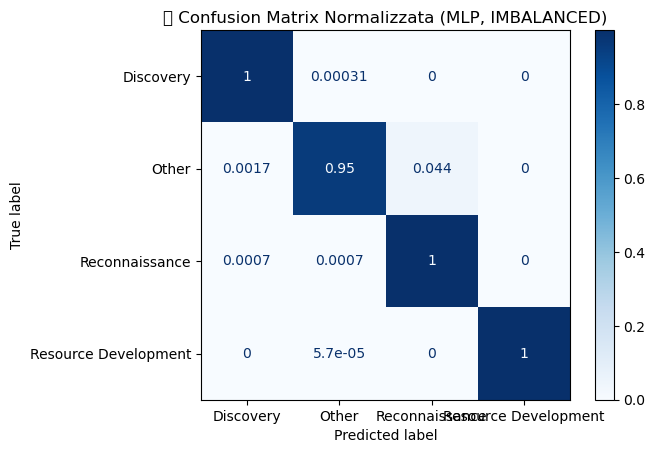

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


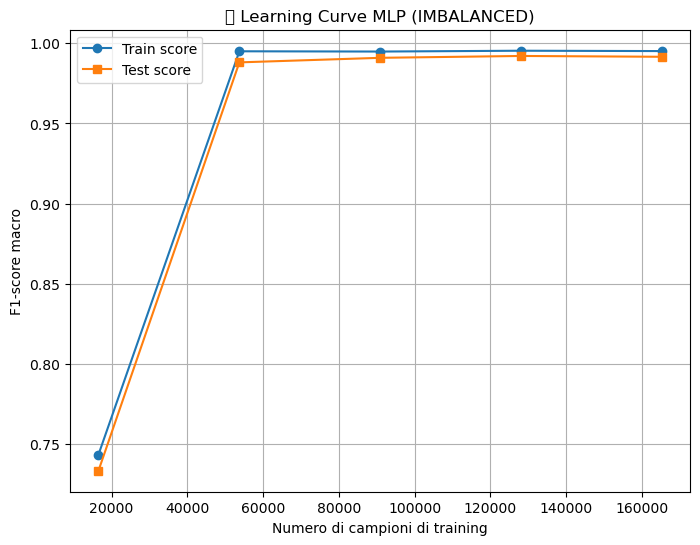

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


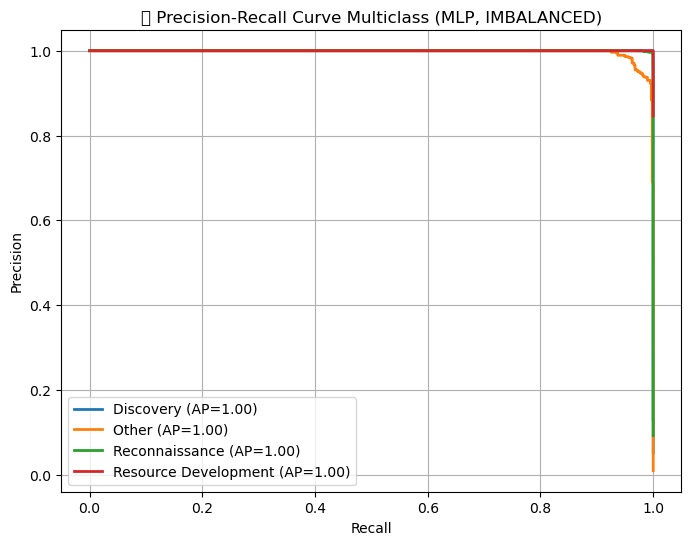

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


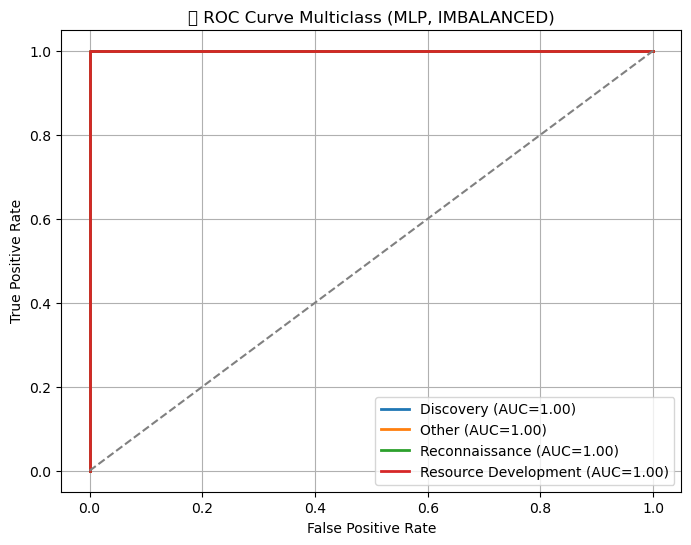


🔍 Calcolo Feature Importance tramite Permutation Importance (MLP)...


c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


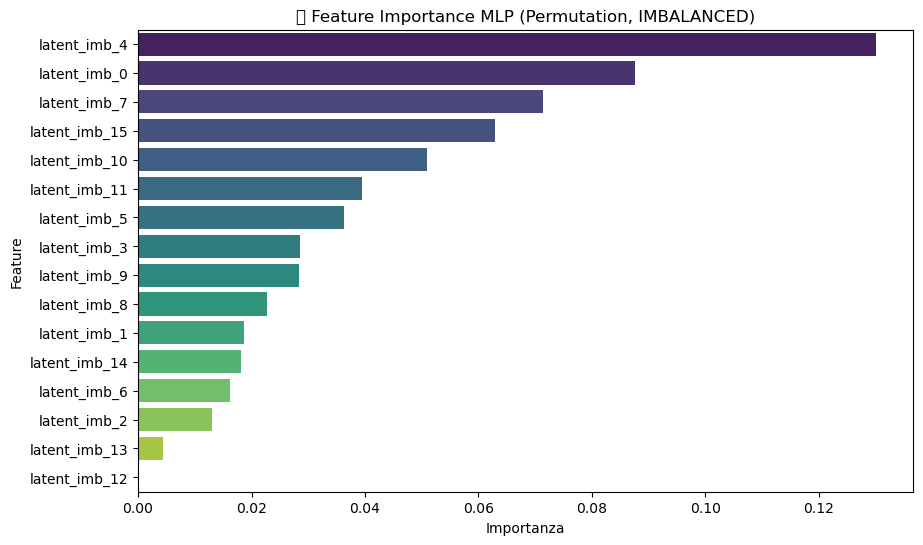

In [3]:
# ==========================================================
# BLOCCO 3 (Imbalanced): MLPClassifier con grid ridotta e monitoraggio
# ==========================================================
import numpy as np
import time
import matplotlib.pyplot as plt
from itertools import product
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    precision_recall_curve, roc_curve, auc, average_precision_score
)
from sklearn.preprocessing import label_binarize

print("🤖 Addestramento MLP (IMBALANCED) con grid ridotta e monitoraggio dettagliato...\n")

# ==========================================================
# 1️⃣ Impostazione base del modello e della griglia iperparametri
# ==========================================================
# ✳️ NOTA METODOLOGICA:
# Poiché il dataset è fortemente sbilanciato e l'MLPClassifier non supporta pesi di classe,
# si è scelto di mantenere una griglia iperparametrica più compatta per:
# - Ridurre l'instabilità dovuta a oscillazioni nella convergenza su dataset imbalanced
# - Limitare la varianza indotta da combinazioni troppo complesse
# - Ottimizzare i tempi di esecuzione mantenendo un approccio sperimentale rigoroso

param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [1e-3],
    'learning_rate_init': [0.001]
}

param_combinations = list(product(
    param_grid['hidden_layer_sizes'],
    param_grid['activation'],
    param_grid['solver'],
    param_grid['alpha'],
    param_grid['learning_rate_init']
))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

best_score = -np.inf
best_params = None
results = []

print(f"🔍 Inizio GridSearch manuale su {len(param_combinations)} combinazioni...\n")

# ==========================================================
# 2️⃣ Ciclo combinazioni e monitoraggio training
# ==========================================================
for i, (hls, act, sol, alpha, lr) in enumerate(param_combinations, 1):
    params = {
        'hidden_layer_sizes': hls,
        'activation': act,
        'solver': sol,
        'alpha': alpha,
        'learning_rate_init': lr
    }
    print(f"⚙️ Combinazione {i}/{len(param_combinations)} → {params}")
    start = time.time()

    fold_scores = []
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_imb_scaled, y_train_imb), 1):
        X_tr, X_val = X_train_imb_scaled.iloc[train_idx], X_train_imb_scaled.iloc[val_idx]
        y_tr, y_val = y_train_imb.iloc[train_idx], y_train_imb.iloc[val_idx]

        model = MLPClassifier(
            random_state=42,
            max_iter=200,
            early_stopping=True,
            **params
        )
        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred, average='macro')
        fold_scores.append(score)
        print(f"   📈 Fold {fold}/3 → F1 = {score:.4f}")

    mean_score = np.mean(fold_scores)
    elapsed = time.time() - start
    print(f"✅ Combinazione {i} completata in {elapsed:.2f}s | F1 medio = {mean_score:.4f}\n")

    results.append((params, mean_score))
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print(f"🏁 GridSearch completata. Miglior F1 = {best_score:.4f}")
print(f"🏆 Migliori iperparametri trovati: {best_params}\n")

# ==========================================================
# 3️⃣ Training finale con i migliori parametri
# ==========================================================
best_mlp = MLPClassifier(
    random_state=42,
    max_iter=200,
    early_stopping=True,
    **best_params
)
best_mlp.fit(X_train_imb_scaled, y_train_imb)

# ==========================================================
# 4️⃣ Metriche dettagliate
# ==========================================================
def print_metrics(y_true, y_pred, name, classes):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n📊 Metriche sul {name} set:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred, labels=classes)
    for i, cls in enumerate(classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificità classe '{cls}': {spec:.4f}")
    return f1

y_train_pred = best_mlp.predict(X_train_imb_scaled)
y_test_pred = best_mlp.predict(X_test_imb_scaled)

train_f1 = print_metrics(y_train_imb, y_train_pred, "TRAIN", best_mlp.classes_)
test_f1 = print_metrics(y_test_imb, y_test_pred, "TEST", best_mlp.classes_)

# ==========================================================
# 5️⃣ Analisi over/underfitting
# ==========================================================
gap_f1 = train_f1 - test_f1
if gap_f1 > 0.05:
    print(f"\n⚠️ Possibile OVERFITTING: gap F1 train-test = {gap_f1:.4f}")
elif test_f1 < 0.7:
    print(f"\n⚠️ Possibile UNDERFITTING: F1 test = {test_f1:.4f}")
else:
    print("\n✅ Modello bilanciato, nessun evidente overfitting/underfitting")

# ==========================================================
# 7️⃣ Visualizzazioni complete (Confusion Matrix, Learning Curve, PR, ROC, Feature Importance)
# ==========================================================
importances_mlp = None
from sklearn.inspection import permutation_importance

print("\n📊 Generazione grafici e visualizzazioni MLP...")

# --- Confusion Matrix ---
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(best_mlp, X_test_imb_scaled, y_test_imb, cmap='Blues', normalize='true')
plt.title("📊 Confusion Matrix Normalizzata (MLP, IMBALANCED)")
plt.show()

# --- Learning Curve ---
train_sizes, train_scores, test_scores = learning_curve(
    best_mlp, X_train_imb_scaled, y_train_imb, cv=3, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Train score", marker='o')
plt.plot(train_sizes, test_mean, label="Test score", marker='s')
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1-score macro")
plt.title("📈 Learning Curve MLP (IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# --- Precision-Recall Curve ---
y_test_bin = label_binarize(y_test_imb, classes=best_mlp.classes_)
y_score = best_mlp.predict_proba(X_test_imb_scaled)

plt.figure(figsize=(8,6))
for i, cls in enumerate(best_mlp.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f"{cls} (AP={ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision-Recall Curve Multiclass (MLP, IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# --- ROC Curve ---
plt.figure(figsize=(8,6))
for i, cls in enumerate(best_mlp.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve Multiclass (MLP, IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# --- Feature Importance tramite Permutation Importance ---
print("\n🔍 Calcolo Feature Importance tramite Permutation Importance (MLP)...")
perm_importance = permutation_importance(best_mlp, X_test_imb_scaled, y_test_imb, n_repeats=10, random_state=42, n_jobs=-1)
importances_mlp = perm_importance.importances_mean
indices = np.argsort(importances_mlp)[::-1]

plt.figure(figsize=(10,6))
sns.barplot(
    x=importances_mlp[indices],
    y=X_train_imb_scaled.columns[indices],
    palette="viridis"
)
plt.title("🌟 Feature Importance MLP (Permutation, IMBALANCED)")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.show()

🏗️ Addestramento LightGBM (IMBALANCED) con class weights e monitoraggio dettagliato...

⚖️ Class weights calcolati per LightGBM: {'Discovery': 4.838229556803995, 'Other': 26.32983014861996, 'Reconnaissance': 2.704293689214532, 'Resource Development': 0.2953729153467634} 

🔍 Inizio GridSearch manuale su 4 combinazioni...

⚙️ Combinazione 1/4 → {'num_leaves': 31, 'max_depth': 10, 'learning_rate': 0.1, 'n_estimators': 200, 'min_child_samples': 20, 'subsample': 0.8, 'colsample_bytree': 0.8}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014143 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3886
[LightGBM] [Info] Number of data points in the train set: 198421, number of used features: 16
[LightGBM] [Info] Start training from score -1.386276
[LightGBM] [Info] Start training from score -1.386296
[LightGBM] [Info] Start training from score -1.386307
[LightGBM] [Info] Start training from score -1.386299
[5

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


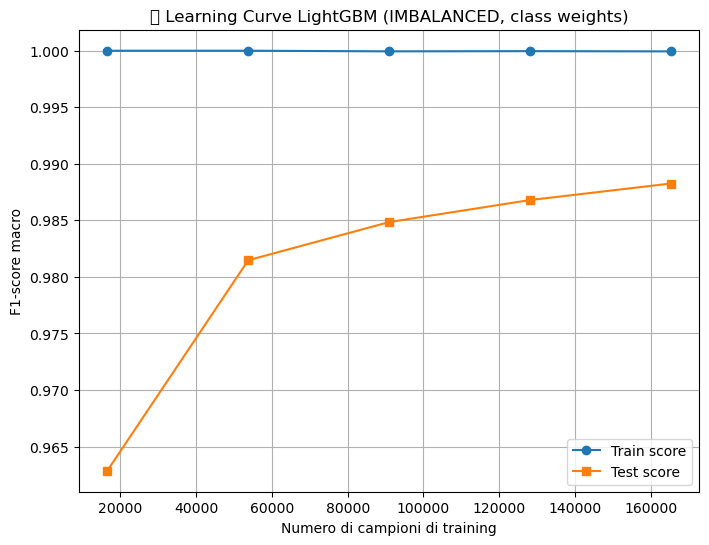


📊 Generazione grafici e visualizzazioni...


<Figure size 800x600 with 0 Axes>

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


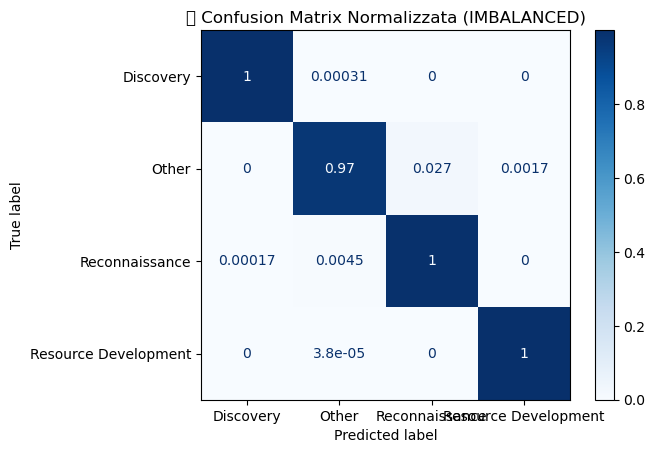

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


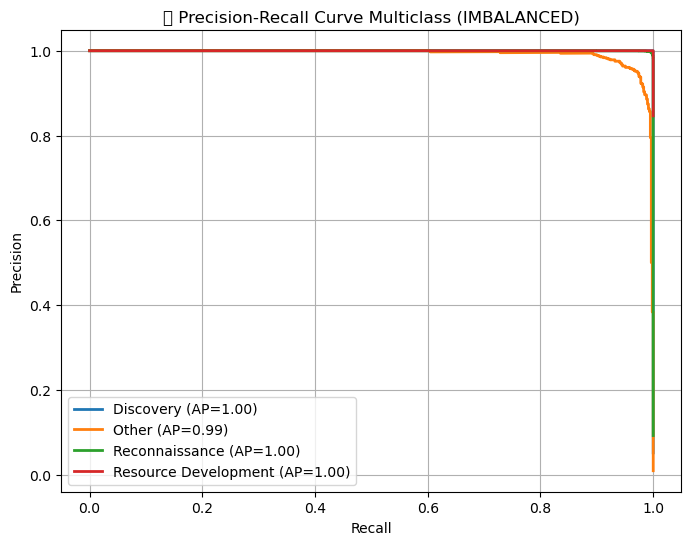

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


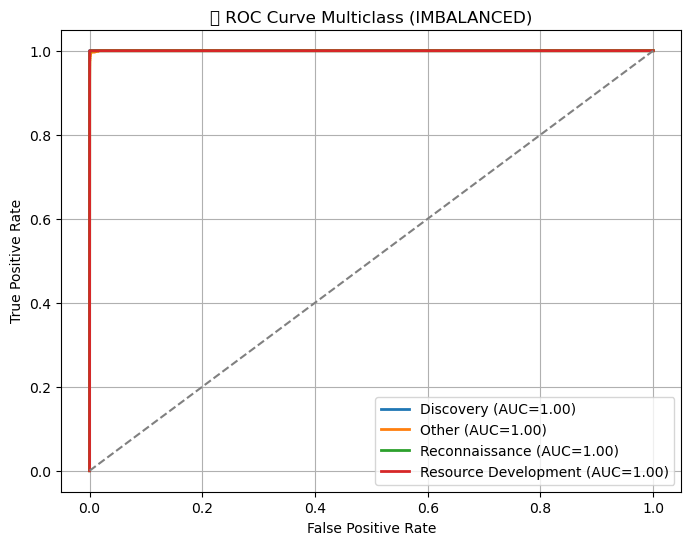

c:\Users\maria\anaconda3\envs\zeek-ml\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


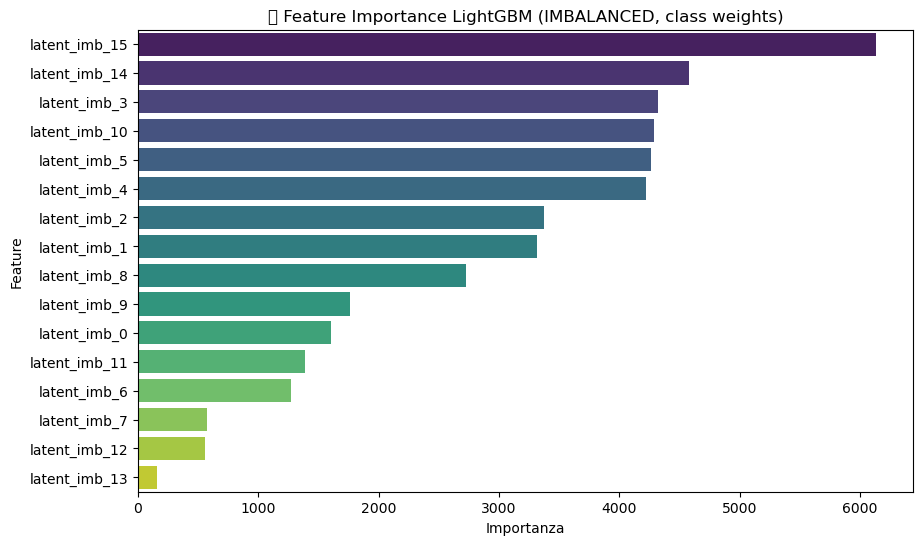

In [4]:
# ==========================================================
# BLOCCO 2 (Imbalanced): LightGBM con class weights + metriche complete e monitoraggio
# ==========================================================
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from sklearn.model_selection import StratifiedKFold, learning_curve
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,
    ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc, average_precision_score
)
from sklearn.preprocessing import label_binarize
import lightgbm as lgb

print("🏗️ Addestramento LightGBM (IMBALANCED) con class weights e monitoraggio dettagliato...\n")

# ==========================================================
# 1️⃣ Impostazione base del modello e della griglia iperparametri
# ==========================================================
classes = np.unique(y_train_imb)
class_counts = y_train_imb.value_counts()
total = len(y_train_imb)
class_weights_lgb = {cls: total / (len(classes) * class_counts[cls]) for cls in classes}
print("⚖️ Class weights calcolati per LightGBM:", class_weights_lgb, "\n")

lgb_base = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    random_state=42,
    class_weight=class_weights_lgb,
    n_jobs=-1
)

# Griglia iperparametri (ridotta ma significativa)
param_grid = {
    'num_leaves': [31, 63],
    'max_depth': [10, 20],
    'learning_rate': [0.1],
    'n_estimators': [200],
    'min_child_samples': [20],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

param_combinations = list(product(
    param_grid['num_leaves'],
    param_grid['max_depth'],
    param_grid['learning_rate'],
    param_grid['n_estimators'],
    param_grid['min_child_samples'],
    param_grid['subsample'],
    param_grid['colsample_bytree']
))

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_score = -np.inf
best_params = None
results = []

print(f"🔍 Inizio GridSearch manuale su {len(param_combinations)} combinazioni...\n")

# ==========================================================
# 2️⃣ Ciclo combinazioni e monitoraggio training
# ==========================================================
for i, (leaves, depth, lr, estim, min_child, subsample, colsample) in enumerate(param_combinations, 1):
    params = {
        'num_leaves': leaves,
        'max_depth': depth,
        'learning_rate': lr,
        'n_estimators': estim,
        'min_child_samples': min_child,
        'subsample': subsample,
        'colsample_bytree': colsample
    }
    print(f"⚙️ Combinazione {i}/{len(param_combinations)} → {params}")
    start = time.time()
    fold_scores = []

    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_imb_scaled, y_train_imb), 1):
        X_tr, X_val = X_train_imb_scaled.iloc[train_idx], X_train_imb_scaled.iloc[val_idx]
        y_tr, y_val = y_train_imb.iloc[train_idx], y_train_imb.iloc[val_idx]

        model = lgb.LGBMClassifier(
            objective='multiclass',
            num_class=len(classes),
            random_state=42,
            class_weight=class_weights_lgb,
            n_jobs=-1,
            **params
        )
        model.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            eval_metric='multi_logloss',
            callbacks=[lgb.log_evaluation(period=50)]  # log ogni 50 iterazioni
        )
        y_pred = model.predict(X_val)
        score = f1_score(y_val, y_pred, average='macro')
        fold_scores.append(score)
        print(f"   📈 Fold {fold}/5 → F1 = {score:.4f}")

    mean_score = np.mean(fold_scores)
    elapsed = time.time() - start
    print(f"✅ Combinazione {i} completata in {elapsed:.2f}s | F1 medio = {mean_score:.4f}\n")

    results.append((params, mean_score))
    if mean_score > best_score:
        best_score = mean_score
        best_params = params

print(f"🏁 GridSearch completata. Miglior F1 = {best_score:.4f}")
print(f"🏆 Migliori iperparametri trovati: {best_params}\n")

# ==========================================================
# 3️⃣ Training finale con i migliori parametri
# ==========================================================
best_lgb = lgb.LGBMClassifier(
    objective='multiclass',
    num_class=len(classes),
    random_state=42,
    class_weight=class_weights_lgb,
    n_jobs=-1,
    **best_params
)
best_lgb.fit(
    X_train_imb_scaled, y_train_imb,
    eval_set=[(X_test_imb_scaled, y_test_imb)],
    eval_metric='multi_logloss',
    callbacks=[lgb.log_evaluation(period=50)]
)

# ==========================================================
# 4️⃣ Metriche dettagliate
# ==========================================================
def print_metrics(y_true, y_pred, name, classes):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    print(f"\n📊 Metriche sul {name} set:")
    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    cm = confusion_matrix(y_true, y_pred, labels=classes)
    for i, cls in enumerate(classes):
        tn = cm.sum() - (cm[i, :].sum() + cm[:, i].sum() - cm[i, i])
        fp = cm[:, i].sum() - cm[i, i]
        spec = tn / (tn + fp) if (tn + fp) > 0 else 0
        print(f"Specificità classe '{cls}': {spec:.4f}")
    return f1

y_train_pred = best_lgb.predict(X_train_imb_scaled)
y_test_pred = best_lgb.predict(X_test_imb_scaled)

train_f1 = print_metrics(y_train_imb, y_train_pred, "TRAIN", best_lgb.classes_)
test_f1 = print_metrics(y_test_imb, y_test_pred, "TEST", best_lgb.classes_)

# ==========================================================
# 5️⃣ Analisi over/underfitting
# ==========================================================
gap_f1 = train_f1 - test_f1
if gap_f1 > 0.05:
    print(f"\n⚠️ Possibile OVERFITTING: gap F1 train-test = {gap_f1:.4f}")
elif test_f1 < 0.7:
    print(f"\n⚠️ Possibile UNDERFITTING: F1 test = {test_f1:.4f}")
else:
    print("\n✅ Modello bilanciato, nessun evidente overfitting/underfitting")

# ==========================================================
# 6️⃣ Learning Curve
# ==========================================================
train_sizes, train_scores, test_scores = learning_curve(
    best_lgb, X_train_imb_scaled, y_train_imb, cv=3, scoring='f1_macro', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5)
)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label="Train score", marker='o')
plt.plot(train_sizes, test_mean, label="Test score", marker='s')
plt.xlabel("Numero di campioni di training")
plt.ylabel("F1-score macro")
plt.title("📈 Learning Curve LightGBM (IMBALANCED, class weights)")
plt.legend()
plt.grid(True)
plt.show()

# ==========================================================
# 7️⃣ Visualizzazioni (Confusion Matrix, PR, ROC, Feature Importance)
# ==========================================================
print("\n📊 Generazione grafici e visualizzazioni...")

# Confusion Matrix
plt.figure(figsize=(8,6))
ConfusionMatrixDisplay.from_estimator(best_lgb, X_test_imb_scaled, y_test_imb, cmap='Blues', normalize='true')
plt.title("📊 Confusion Matrix Normalizzata (IMBALANCED)")
plt.show()

# Precision-Recall Curve
y_test_bin = label_binarize(y_test_imb, classes=best_lgb.classes_)
y_score = best_lgb.predict_proba(X_test_imb_scaled)

plt.figure(figsize=(8,6))
for i, cls in enumerate(best_lgb.classes_):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    ap = average_precision_score(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f"{cls} (AP={ap:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("📈 Precision-Recall Curve Multiclass (IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# ROC Curve
plt.figure(figsize=(8,6))
for i, cls in enumerate(best_lgb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{cls} (AUC={roc_auc:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("📈 ROC Curve Multiclass (IMBALANCED)")
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
importances = best_lgb.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
sns.barplot(
    x=importances[indices],
    y=X_train_imb_scaled.columns[indices],
    palette="viridis"
)
plt.title("🌟 Feature Importance LightGBM (IMBALANCED, class weights)")
plt.xlabel("Importanza")
plt.ylabel("Feature")
plt.show()
